In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**TASK-A:** Please download the dataset and upload it to Colab environment. Then check the dataset (head and tail) after reading the dataset. 

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


**TASK-B:** Please check the descriptive statistics of this dataset by the use of describe function.

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**TASK-C:** Please provide a control for the missing values and report your findings very briefly.

In [5]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


> There is no missing values.

**TASK-D:** Please check the dataset regarding the potential outliers by the use of IQR method and report your findings accordingly.

<AxesSubplot:xlabel='Annual Income (k$)'>

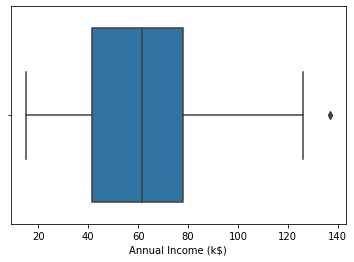

In [6]:
sns.boxplot(x=df["Annual Income (k$)"])

<AxesSubplot:xlabel='Spending Score (1-100)'>

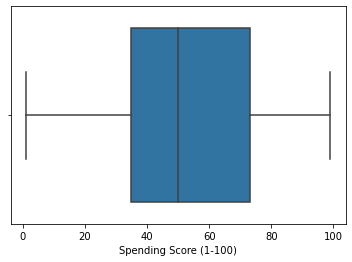

In [7]:
sns.boxplot(x=df["Spending Score (1-100)"])

In [8]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64


In [52]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(198, 5)

**TASK-E:** Please provide a correlation analysis for the columns and demonstrate it via heatmap.

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


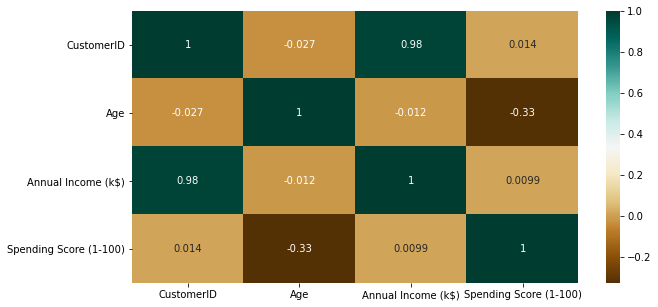

In [11]:
plt.figure(figsize=(10, 5))
c= df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
c

**TASK-F:** Please provide histrograms and boxplots for each of the columns and briefly write down your observations.

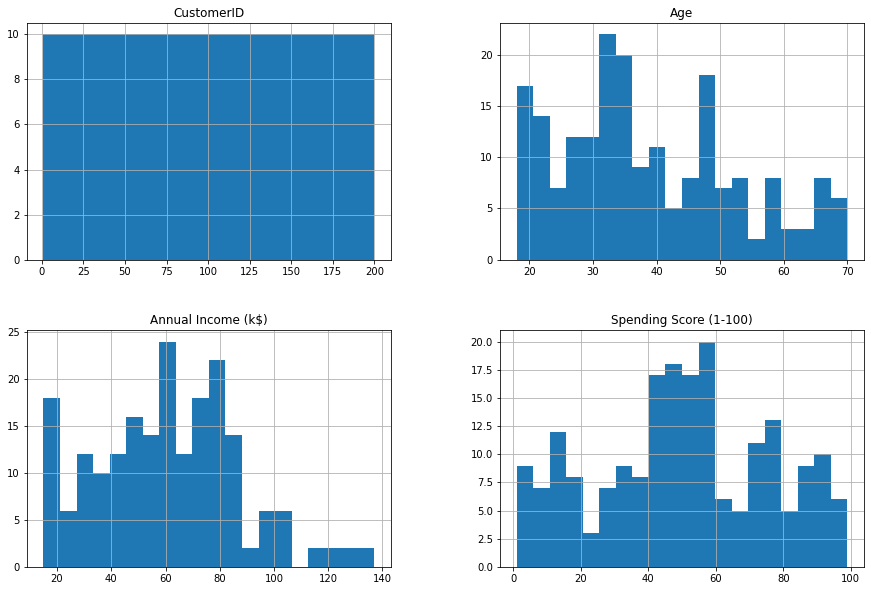

In [15]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

**TASK-G:** Please provide a pairplot from the Seaborn library for understanding the relationship between columns.

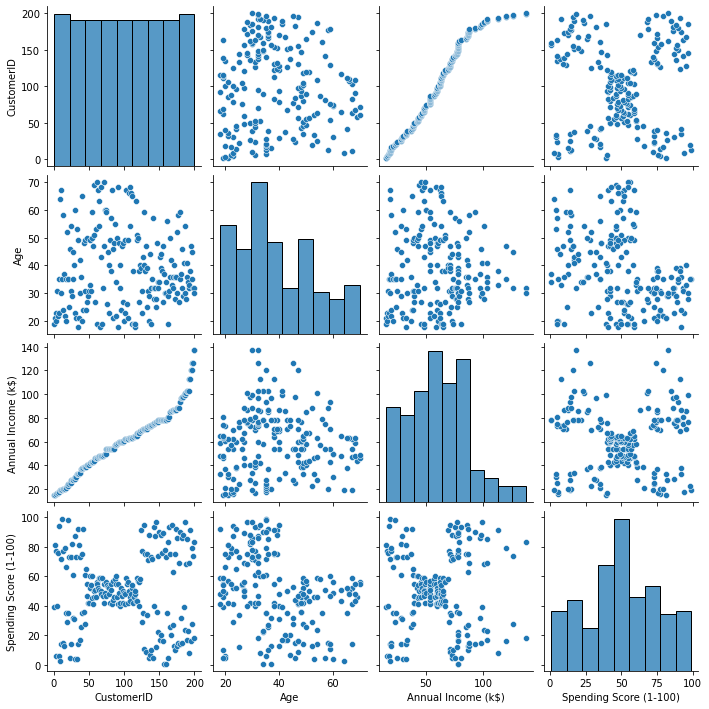

In [13]:
sns.pairplot(df)

**TASK-H:** Please provide a comprehensive analysis by the use of a scatter plot with getting the possible contributions from color and size parameters.

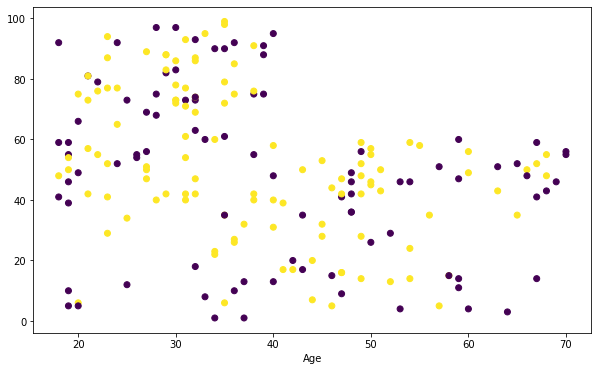

In [20]:
gender = {'Male': 0,'Female': 1}
df_gender = pd.Series([gender[item] for item in df.Gender])

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Age'], df['Spending Score (1-100)'], c=df_gender)
ax.set_xlabel('Age')
plt.show()

**TASK-I:** Please provide a pivot table for the following analyses:
- Gender based analysis (Female or Male)
- Age based analysis (Quartiles: 4 groups)
- Annual income (higher/lower than median)
- Spending score (higher/lower than median)

Your table should include the counts of these mall customers regarding the distributions given above.


In [59]:
age = pd.cut(df["Age"], [18, 31, 44, 57, 70])
ann = pd.qcut(df["Annual Income (k$)"], 2)
sps = pd.qcut(df["Spending Score (1-100)"], 2)
df_pivot = df.pivot_table("Spending Score (1-100)", index=['Gender', age], columns=[ann, sps], aggfunc="count")
df_pivot

Annual Income (k$)     (14.999, 61.0]              (61.0, 126.0]             
Spending Score (1-100)  (0.999, 50.0] (50.0, 99.0] (0.999, 50.0] (50.0, 99.0]
Gender Age                                                                   
Female (18, 31]                   6.0         17.0           6.0         11.0
       (31, 44]                   9.0          3.0          10.0         12.0
       (44, 57]                  12.0          5.0           9.0          2.0
       (57, 70]                   4.0          3.0           2.0          NaN
Male   (18, 31]                   2.0         11.0           5.0          7.0
       (31, 44]                   3.0          3.0           8.0         12.0
       (44, 57]                   8.0          1.0           5.0          1.0
       (57, 70]                   6.0          4.0           5.0          2.0

<AxesSubplot:xlabel='Gender,Age'>

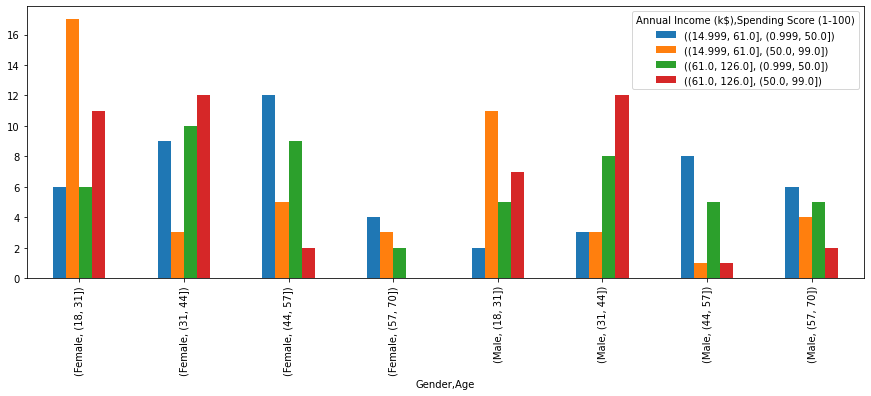

In [60]:
df_pivot.plot(kind="bar", figsize=(15, 5))